<a href="https://colab.research.google.com/github/jmpark0118/DeepLearningWithPython/blob/master/PART2_5_4_Visualizing_what_convnets_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter5 : Deep learning for computer vision

## 5.4 Visualizing what convnets learn

It's often said that deep-learning models are "black boxes": representations are difficult to extract and present in a human-readable form.

Although this is partially true for certain types of deep-learning models, it's definitely not true for convnets. The representations learned by convnets are highly amenable to visualization, in large part because they're *representations of visual concepts*.

In this chapter, we'll cover three of the most accessible and useful ones:
  * *Visualizing intermediate convnet outputs (intermediate activations)*
    - Useful for understanding how successive convnet layers transform their input, and for getting a first idea of the meaning of individual convnet filters.
  * *Visualizing convnets filters*
    - Useful for understanding precisely what visual pattern or concept each filter in a convnet is receptive to.
  * *Visualizing heatmaps of class activation in an image*
    - Useful for understanding which parts of an image were identified as belonging to a given class, thus allowing you to localize objects in images.

### 5.4.1 Visualizing intermediate activations

Visualizing intermediate activations consists of displaying the feature maps that are output by various convolution and pooling layers in a network, given a certain input. This gives a view into how an input is decomposed into the different filters learned by the network. SInce each channel (depth) encodes relatively independent features, the proper way to visualize these feature maps is by independently plotting the contents of every channel as a 2D image.

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from keras.models import load_model
model = load_model('cats_and_dogs_small_2.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

#### Preprocessing a single image

In [0]:
img_path = '/content/gdrive/My Drive/github/cats_and_dogs_small/test/cats/cat.1700.jpg'

In [0]:
from keras.preprocessing import image
import numpy as np

In [0]:
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

#### Displaying the test picture

In [0]:
import matplotlib.pyplot as plt

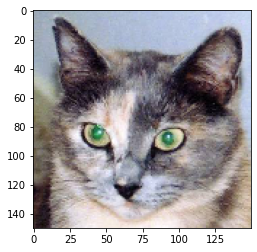

In [0]:
plt.imshow(img_tensor[0])
plt.show()

In order to extract the feature maps you want to look at, you'll create a Keras model that takes batches of images as input, and outputs the activations of all convolution and pooling layers.

#### Instantiating a model from an input tensor and a list of output tensors

In [0]:
from keras import models

In [0]:
# extracts the outputs of the top eight layers
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [0]:
layer_outputs

[<tf.Tensor 'conv2d_4_1/Relu:0' shape=(None, 148, 148, 32) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4_1/MaxPool:0' shape=(None, 74, 74, 32) dtype=float32>,
 <tf.Tensor 'conv2d_5_1/Relu:0' shape=(None, 72, 72, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_5_1/MaxPool:0' shape=(None, 36, 36, 64) dtype=float32>,
 <tf.Tensor 'conv2d_6_1/Relu:0' shape=(None, 34, 34, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_6_1/MaxPool:0' shape=(None, 17, 17, 128) dtype=float32>,
 <tf.Tensor 'conv2d_7_1/Relu:0' shape=(None, 15, 15, 128) dtype=float32>,
 <tf.Tensor 'max_pooling2d_7_1/MaxPool:0' shape=(None, 7, 7, 128) dtype=float32>]

In [0]:
activation_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4_input (InputLayer)  (None, 150, 150, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0   

#### Running the model in predict mode

In [0]:
# returns a list of five Numpy arrays: one array per layer activation
activations = activation_model.predict(img_tensor)

In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)   # (1, size, size, n_features)

(1, 148, 148, 32)


This is a 148 x 148 feature map with 32 channels.

#### Visualizing the forth channel

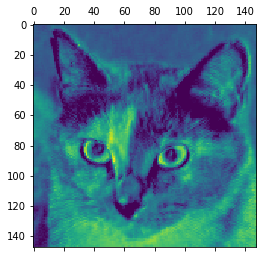

In [0]:
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

#### Visualizing the sixteenth channel

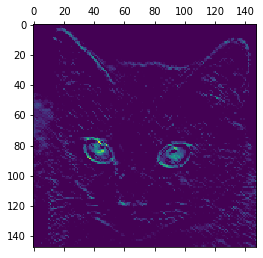

In [0]:
plt.matshow(first_layer_activation[0, :, :, 16], cmap='viridis')
plt.show()

#### Visualizing every channel in every intermediate activation

In [0]:
# names of the layers, so you cna have them as part of your plot
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]   # number of features in the feature map
    size = layer_activation.shape[1]
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size*n_cols, images_per_row*size))

    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0, :, :, col*images_per_row+row]
            
            # post-processes the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            # displays the grid
            display_grid[col*size : (col+1)*size, row*size : (row+1)*size] = channel_image
    
    scale = 1./size
    
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    plt.show()

There are a few things to note here:
  + The first layer acts as a collection of various edge detectors. The activations retain almost all of the information present in the inital picture.
  + **As you go higher, the activations become increasingly abstract and less visually interpretable**. They begin to encode higher-level concepts. Higher presentations carry increasingly less information about the visual contents of the image, and increasingly more information related to the class of the image.
  + The sparsity of the activations increases with the depth of the layer. This means the pattern encoded by the filter isn't found in the input image.

A deep neural network effectively acts as an ***information distillation pipeline***, with raw data going in and being repeatedly transformed so that irrelevant information is filtered out, and useful information is magnified and refined.

### 5.4.2 Visualizing convnet filters

Another easy way to inspect the filters learned by convnets is to display the visual pattern that each filter is mean to respond to.

This can be done with *gradient ascent in input space*: applying *gradient descent* to the value of the input image of a convnet so as to *maximize* the response of a specific filter, starting from a blank input image.

#### Defining the loss tensor for filter visualization

In [0]:
from keras.applications import VGG16
from keras import backend as K

In [0]:
model = VGG16(weights='imagenet',
              include_top=False)

layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
loss = K.mean(layer_output[:, :, :, filter_index])

58892288/58889256 [==============================] - 2s 0us/step


#### Obtaining the gradient of the loss with regard to the input

In [0]:
grads = K.gradients(loss, model.input)[0]

#### Gradient-normalization trick

In [0]:
grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5)

#### Fetching Numpy output values given Numpy input values

In [0]:
iterate = K.function([model.input], [loss, grads])

In [0]:
import numpy as np
loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

#### Loss maximization via stochastic gradient descent

In [0]:
input_img_data = np.random.random((1, 150, 150, 3))*20+128.

step = 1.    # magnitude of each gradient update
for i in range(40):    # runs gradient ascent for 40 steps
    loss_value, grads_value = iterate([input_img_data])
    input_img_data += grads_value*step

#### Utility function to convert a tensor into a valid image

In [0]:
def deprocess_image(x):
    x -= x.mean()
    x /= (x.std()+1e-5)
    x *= 0.1

    x += 0.5
    x = np.clip(x, 0, 1)

    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

#### Function to generate filter visualization

In [0]:
def generate_pattern(layer_name, filter_index, size=150):
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])

    grads = K.gradients(loss, model.input)[0]
    grads /= (K.sqrt(K.mean(K.square(grads)))+1e-5)

    iterate = K.function([model.input], [loss, grads])

    input_img_data = np.random.random((1, size, size, 3))*20+128.

    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value*step
    
    img = input_img_data[0]
    return deprocess_image(img)

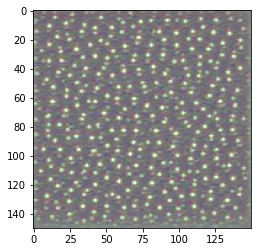

In [0]:
plt.imshow(generate_pattern('block3_conv1', 0))
plt.show()

#### Generating a grid of all filter response patterns in a layer

In [0]:
for layer_name in ['block1_conv1', 'block2_conv1', 'block3_conv1', 'block4_conv1']:
    size = 64
    margin = 5
    
    results = np.zeros((8*size+7*margin, 8*size+7*margin, 3))

    for i in range(8):
        for j in range(8):
            filter_img = generate_pattern(layer_name, i+(j*8), size=size)
            horizontal_start = i*size+i*margin
            horizontal_end = horizontal_start+size
            vertical_start = j*size+j*margin
            vertical_end = vertical_start+size

            results[horizontal_start : horizontal_end, vertical_start : vertical_end, :] = filter_img

    plt.figure(figsize=(20, 20))
    plt.imshow(results.astype('uint8'))
    plt.title(layer_name)
    plt.show()

> These filter visualizations tell you a lot about how convnet layers see the world: each layer in a convnet learns a collection of filters such that their inputs can be expressed as a combination of the filters. The filters in these convnet filter banks get increasingly complex and refined as you go higher in the model:
  + The filters from the first layer in the model (block1_conv1) encode simple directional edges and colors (or colored edges, in some cases).
  + The filters from block2_conv1 encode simple textures made from combinations of edges and colors.
  + The filters in higher layers begin to resemble textures found in natural images: feathers, eyes, leaves, and so on.

### 5.4.3 Visualizing heatmaps of class activation

This visualization technique is useful for understanding which parts of a given image led a convnet to its final classification decision. This is helpful for debugging the decision process of a convnet, particularly in the case of a classification mistake. It also allows you to locate specific objects in an image.

#### Loading the VGG16 network with pretrained weights

In [0]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')

553467904/553467096 [==============================] - 35s 0us/step


#### Preprocessing an input image for VGG16

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

In [0]:
img_path = '/content/gdrive/My Drive/github/creative_commons_elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

40960/35363 [==================================] - 0s 0us/step
Predicted: [('n02504458', 'African_elephant', 0.8474204), ('n01871265', 'tusker', 0.11709696), ('n02408429', 'water_buffalo', 0.023288876)]


> The top three classes predicted for this image are as follows:
  + African elephant (with 84.7% probability)
  + Tusker (with 11.7% probability)
  + Water buffalo (with 2.3% probability)

In [0]:
np.argmax(preds[0])

386

#### Setting up the Grad-CAM algorithm

In [0]:
african_elephant_output = model.output[:, 386]
last_conv_layer = model.get_layer('block5_conv3')
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))

iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]
heatmap = np.mean(conv_layer_output_value, axis = -1)

#### Heatmap post-processing

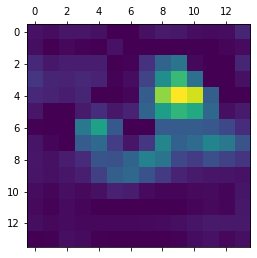

In [0]:
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)
plt.show()

#### Superimposing the heatmap with the original picture

In [0]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255*heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap*0.4+img
cv2.imwrite('/content/gdrive/My Drive/github/elephant.jpg', superimposed_img)

True

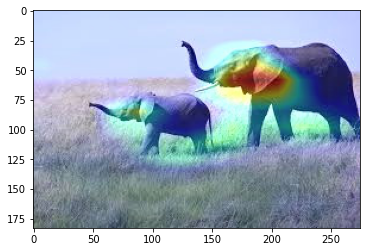

In [0]:
img_path = '/content/gdrive/My Drive/github/elephant.jpg'
img = image.load_img(img_path)

plt.imshow(img)
plt.show()